<a href="https://colab.research.google.com/github/snmkrhn/EEG-Sinyalleri-ile-Psikiyatrik-Bozukluklar-n-Tespiti/blob/main/EEG_Sinyalleri_ile_Psikiyatrik_Bozukluklar%C4%B1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# kaggle.json dosyasını yükle
files.upload()


Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"sinemkarahan","key":"98f966dcd7539fa1de39ad8b0c8e7639"}'}

In [ ]:
!ls


 eeg-psychiatric-disorders-dataset.zip	'kaggle (3).json'   sample_data


In [ ]:
!mv "kaggle (3).json" kaggle.json


In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d shashwatwork/eeg-psychiatric-disorders-dataset --force



Dataset URL: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/4.72M [00:00<?, ?B/s]
100% 4.72M/4.72M [00:00<00:00, 74.9MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("eeg-psychiatric-disorders-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("eeg_data")


In [ ]:
!ls eeg_data


EEG.machinelearing_data_BRMH.csv


In [ ]:
!ls /content/


eeg_data  eeg-psychiatric-disorders-dataset.zip  kaggle.json  sample_data


In [ ]:
import zipfile

# Zip dosyasını çıkartalım
with zipfile.ZipFile("eeg-psychiatric-disorders-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/eeg_data")

# Çıkartma işleminden sonra dosya listesini kontrol edelim
!ls /content/eeg_data


EEG.machinelearing_data_BRMH.csv


In [ ]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv('/content/eeg_data/EEG.machinelearing_data_BRMH.csv')

# İlk birkaç satırı göster
df.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [ ]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from math import ceil

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


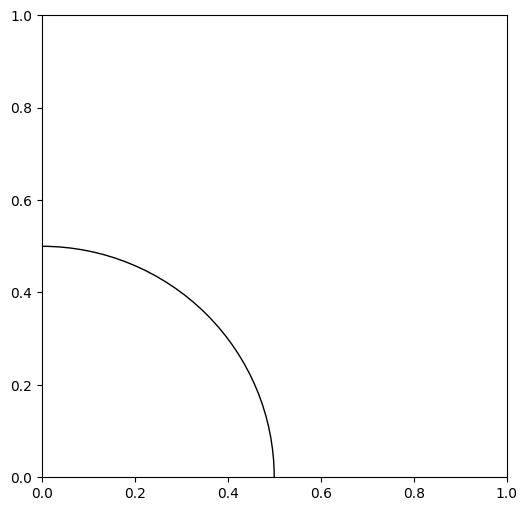

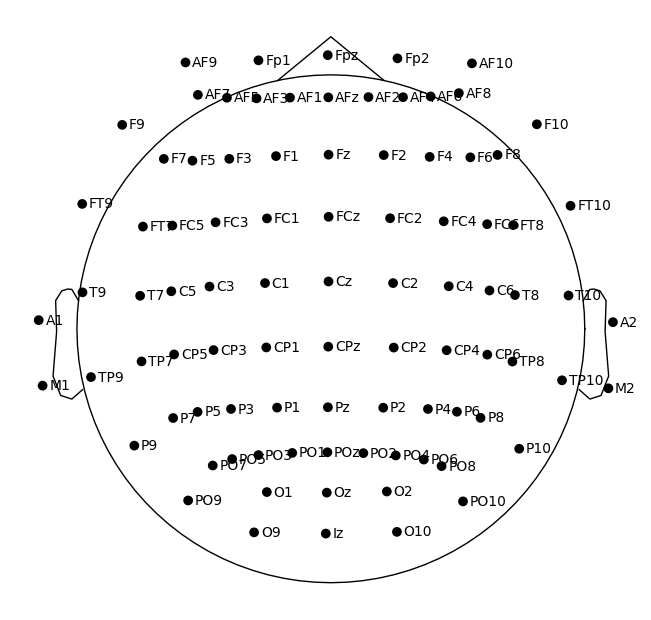

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# 10-20 sistemine göre EEG elektrot yerleşimi
montage = mne.channels.make_standard_montage("standard_1020")

# Elektrot noktalarını al
ch_positions = montage.get_positions()['ch_pos']

# X ve Y koordinatlarını al
xy_coords = np.array([ch_positions[ch][:2] for ch in montage.ch_names])

# Elektrot isimlerini al
labels = montage.ch_names

# Renkleri belirle (frontal, parietal, occipital gibi farklı bölgeler için)
colors = {
    'F': 'lightblue',   # Frontal lob
    'C': 'yellow',      # Central bölge
    'P': 'lightgreen',  # Parietal lob
    'O': 'lightcoral',  # Oksipital lob
    'T': 'lightgreen',  # Temporal lob
}

fig, ax = plt.subplots(figsize=(6, 6))

# Beyin şekli çizimi
circle = plt.Circle((0, 0), 0.5, color='black', fill=False)
ax.add_artist(circle)

import mne
import matplotlib.pyplot as plt

# 10-20 sistemine göre standart elektrot yerleşimi
montage = mne.channels.make_standard_montage("standard_1020")

# Elektrotları göster
fig = montage.plot(kind='topomap', show_names=True)

plt.show()





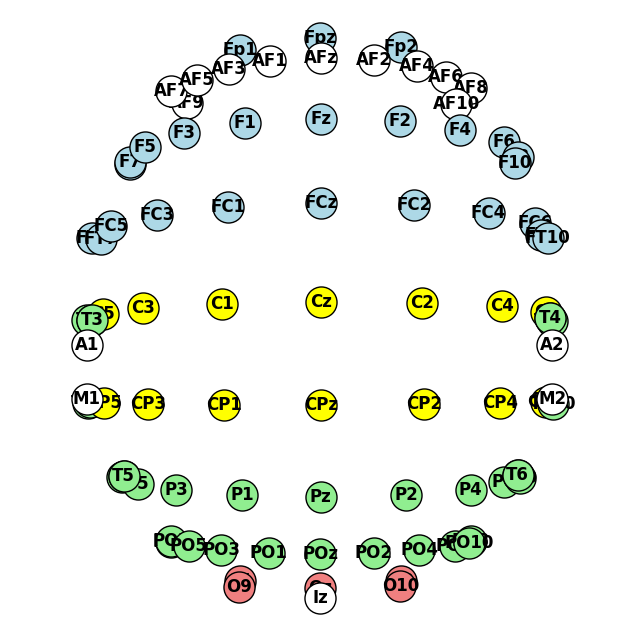

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# 10-20 sistemine göre EEG elektrot yerleşimi
montage = mne.channels.make_standard_montage("standard_1020")

# Elektrot noktalarını al
ch_positions = montage.get_positions()['ch_pos']

# X ve Y koordinatlarını al
xy_coords = np.array([ch_positions[ch][:2] for ch in montage.ch_names])

# Elektrot isimlerini al
labels = montage.ch_names

# Renkleri belirle (frontal, parietal, occipital gibi farklı bölgeler için)
colors = {
    'F': 'lightblue',   # Frontal lob
    'C': 'yellow',      # Central bölge
    'P': 'lightgreen',  # Parietal lob
    'O': 'lightcoral',  # Oksipital lob
    'T': 'lightgreen',  # Temporal lob
}

fig, ax = plt.subplots(figsize=(8, 8))  # Grafik boyutunu büyüttüm

# Beyin şekli çizimi
circle = plt.Circle((0, 0), 0.5, color='black', fill=False)
ax.add_artist(circle)

# Elektrot noktalarını çiz
for i, (x, y) in enumerate(xy_coords):
    region = labels[i][0]  # İlk harf ile bölge belirle
    color = colors.get(region, 'white')  # Bölgeye göre renk seç

    # Elektrot noktası çiz
    ax.scatter(x, y, color=color, edgecolors='black', s=500, zorder=3)

    # Elektrot ismini yaz
    ax.text(x, y, labels[i], fontsize=12, ha='center', va='center', fontweight='bold')

ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# 🔥 Eksenleri eşit oranda ölçeklendir
plt.axis("equal")

plt.show()


In [ ]:
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()
channels

,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [ ]:
for key in chs.keys():
    chs[key]+=[0]
chs

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

<ipython-input-15-dd49041d41c7>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mont.plot()


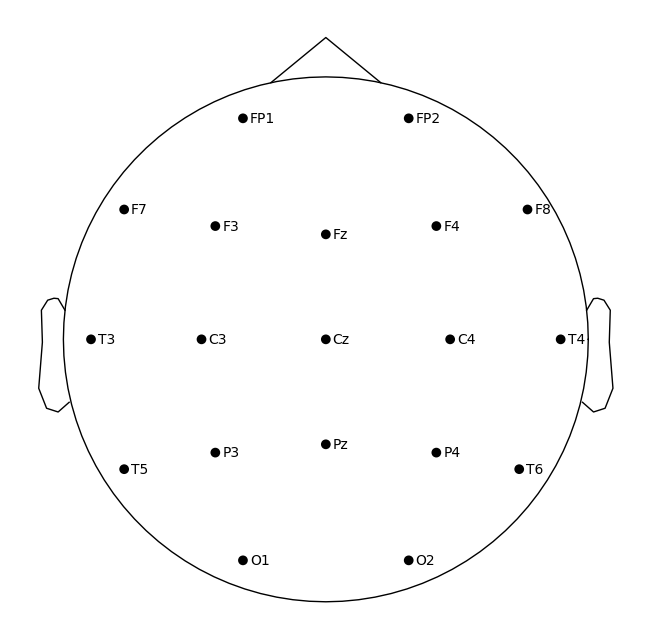

In [ ]:
mont = mne.channels.make_dig_montage(chs)
mont.plot()
plt.show()

In [ ]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vmin=vmin, vmax=vmax,
                          cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving kaggle (4).json to kaggle (4).json


In [ ]:
!mv "kaggle (4).json" kaggle.json

mv: cannot stat 'kaggle (4).json': No such file or directory


In [ ]:
import os

# Eğer yanlış isimlendirilmişse, düzelt
if "kaggle (4).json" in os.listdir():
    os.rename("kaggle (4).json", "kaggle.json")

# Kaggle API anahtarını doğru konuma taşı
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Doğru izinleri ver


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # API anahtarına doğru izinleri ver


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d shashwatwork/eeg-psychiatric-disorders-dataset
!unzip eeg-psychiatric-disorders-dataset.zip



Dataset URL: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
eeg-psychiatric-disorders-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  eeg-psychiatric-disorders-dataset.zip
replace EEG.machinelearing_data_BRMH.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import os

# Kaggle API anahtarı var mı kontrol et
if os.path.exists("/root/.kaggle/kaggle.json"):
    print("✅ Kaggle API anahtarı doğru yüklenmiş.")
else:
    print("❌ Kaggle API anahtarı bulunamadı. Yeniden yüklemeniz gerekiyor.")


❌ Kaggle API anahtarı bulunamadı. Yeniden yüklemeniz gerekiyor.


In [2]:
from google.colab import files

# Kaggle API anahtarını yükle
files.upload()


Saving kaggle (4).json to kaggle (4).json


{'kaggle (4).json': b'{"username":"sinemkarahan","key":"7bd19291afde2ca955fb013ab63ed999"}'}

In [3]:
import os

# Eğer yanlış isimlendirilmişse, düzelt
if "kaggle (4).json" in os.listdir():
    os.rename("kaggle (4).json", "kaggle.json")

# Kaggle API anahtarını doğru konuma taşı
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Doğru izinleri ver


In [4]:
!kaggle datasets download -d shashwatwork/eeg-psychiatric-disorders-dataset


Dataset URL: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [5]:
!unzip -o eeg-psychiatric-disorders-dataset.zip -d eeg_data


Archive:  eeg-psychiatric-disorders-dataset.zip
  inflating: eeg_data/EEG.machinelearing_data_BRMH.csv  


In [6]:
import os

# Çıkarılan dosyaları kontrol et
print(os.listdir("eeg_data"))


['EEG.machinelearing_data_BRMH.csv']


In [7]:
import pandas as pd

df = pd.read_csv("eeg_data/EEG.machinelearing_data_BRMH.csv")  # Dosya adını buradan kontrol et
df.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [8]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vmin=vmin, vmax=vmax,
                          cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [10]:
import os

# Klasörde hangi dosyalar var?
print(os.listdir("eeg_data"))


['EEG.machinelearing_data_BRMH.csv']


In [11]:
import pandas as pd

# Doğru dosya yolu ile CSV dosyasını oku
df = pd.read_csv("eeg_data/EEG.machinelearing_data_BRMH.csv")

# İlk 5 satırı görüntüle
df.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [12]:
# One of the columns contains no data, it separates data
# patient info | abs power of PSD per band per channel | sep_col | functional connectivity data
mis = df.isna().sum()
sep_col = mis[mis == df.shape[0]].index[0]
df = df.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)
df

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,1.966436,1.763397,1.285942,2.437923,2.130979,1.727413,1.710518,2.574734,2.533354,5.596057
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,2.701922,2.685138,2.648595,2.559590,3.054965,3.163359,3.247100,2.646515,3.385173,3.085049
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,3.258838,2.434620,1.501337,0.840513,1.733498,1.610465,1.644675,1.216763,1.614421,1.164097
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,1.849005,1.678465,3.655796,1.429330,3.151128,1.630643,1.888551,1.447402,1.819110,1.302056


In [15]:
import numpy as np

def reformat_name(name):
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'

reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2], reformat_vect(df.columns[2:])))
df = df.set_axis(new_colnames, axis=1)
print(df.columns)


Index(['main.disorder', 'specific.disorder', 'delta.FP1', 'delta.FP2',
       'delta.F7', 'delta.F3', 'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=116)


In [17]:
print(df.dtypes)


main.disorder         object
specific.disorder     object
delta.FP1            float64
delta.FP2            float64
delta.F7             float64
                      ...   
gamma.Pz             float64
gamma.P4             float64
gamma.T6             float64
gamma.O1             float64
gamma.O2             float64
Length: 116, dtype: object


In [18]:
numeric_cols = df.select_dtypes(include=['number']).columns  # Sadece sayısal sütunları seç
main_mean = df.groupby('main.disorder')[numeric_cols].mean().reset_index()
spec_mean = df.groupby('specific.disorder')[numeric_cols].mean().reset_index()


In [20]:
numeric_cols = df.select_dtypes(include=['number']).columns
main_mean = df.groupby('main.disorder')[numeric_cols].mean().reset_index()


In [26]:
print(main_mean.columns)


Index(['main.disorder', 'delta.FP1', 'delta.FP2', 'delta.F7', 'delta.F3',
       'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3', 'delta.C3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=115)


In [27]:
main_mean = main_mean.set_index('main.disorder')  # Bunu çalıştır!
print(main_mean.index)  # Tekrar kontrol et


Index(['Addictive disorder', 'Anxiety disorder', 'Healthy control',
       'Mood disorder', 'Obsessive compulsive disorder', 'Schizophrenia',
       'Trauma and stress related disorder'],
      dtype='object', name='main.disorder')


In [28]:
# 1. Gamma ile başlayan sütunları seç
gamma_columns = [col for col in main_mean.columns if col.startswith('gamma.')]

# 2. Gamma sütunlarını 'Schizophrenia' için al
test = main_mean.loc['Schizophrenia', gamma_columns]

# 3. Sütun isimlerinden 'gamma.' kısmını kaldır
test.index = [col.replace('gamma.', '') for col in gamma_columns]

# 4. Sonucu yazdır
print(test)


FP1    3.681332
FP2    3.840776
F7     3.586139
F3     3.380585
Fz     3.279946
F4     3.411508
F8     3.784580
T3     4.228335
C3     3.165926
Cz     3.080554
C4     3.041254
T4     3.387337
T5     2.435776
P3     2.736861
Pz     2.799705
P4     2.865227
T6     2.966232
O1     4.257993
O2     3.868594
Name: Schizophrenia, dtype: float64


In [66]:
# mean powers per main disorder
main_mean = df.groupby('main.disorder').mean().reset_index()
# mean powers per main disorder
spec_mean = df.groupby('specific.disorder').mean().reset_index()
# list of bands
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
# convert from wide to long
main_mean = pd.wide_to_long(main_mean, bands, ['main.disorder'], 'channel', sep='.', suffix='\w+')
spec_mean = pd.wide_to_long(spec_mean, bands, ['specific.disorder'], 'channel', sep='.', suffix='\w+')
main_mean

TypeError: agg function failed [how->mean,dtype->object]

In [53]:
print(main_mean.index)  # 'Schizophrenia' indeks olarak var mı?
print(main_mean.columns)  # 'gamma' sütunu var mı?


Index(['Addictive disorder', 'Anxiety disorder', 'Healthy control',
       'Mood disorder', 'Obsessive compulsive disorder', 'Schizophrenia',
       'Trauma and stress related disorder'],
      dtype='object', name='main.disorder')
Index(['delta.FP1', 'delta.FP2', 'delta.F7', 'delta.F3', 'delta.Fz',
       'delta.F4', 'delta.F8', 'delta.T3', 'delta.C3', 'delta.Cz',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=114)


In [55]:
print("Test Index:", test.index)
print("Channels Index:", channels.index)


Test Index: Index(['gamma.FP1', 'gamma.FP2', 'gamma.F7', 'gamma.F3', 'gamma.Fz',
       'gamma.F4', 'gamma.F8', 'gamma.T3', 'gamma.C3', 'gamma.Cz', 'gamma.C4',
       'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz', 'gamma.P4', 'gamma.T6',
       'gamma.O1', 'gamma.O2'],
      dtype='object')
Channels Index: Index(['FP1', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
       'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2'],
      dtype='object')


In [56]:
test = test.reindex(channels.index)  # test'in indekslerini channels'a uygun hale getir


In [59]:
channels = channels.reindex(test.index)  # Channels'ı test'e uygun hale getir
assert (test.index == channels.index).all()  # Tekrar kontrol et


In [61]:
import mne
help(mne.viz.plot_topomap)


Help on function plot_topomap in module mne.viz.topomap:

plot_topomap(data, pos, *, ch_type='eeg', sensors=True, names=None, mask=None, mask_params=None, contours=6, outlines='head', sphere=None, image_interp='cubic', extrapolate='auto', border='mean', res=64, size=1, cmap=None, vlim=(None, None), cnorm=None, axes=None, show=True, onselect=None)
    Plot a topographic map as image.
    
    Parameters
    ----------
    data : array, shape (n_chan,)
        The data values to plot.
    pos : array, shape (n_channels, 2) | instance of Info
        Location information for the channels. If an array, should provide the x
        and y coordinates for plotting the channels in 2D.
        If an :class:`~mne.Info` object it must contain only one channel type
        and exactly ``len(data)`` channels; the x/y coordinates will
        be inferred from the montage in the :class:`~mne.Info` object.
    ch_type : 'mag' | 'grad' | 'planar1' | 'planar2' | 'eeg' | None
        The channel type to 

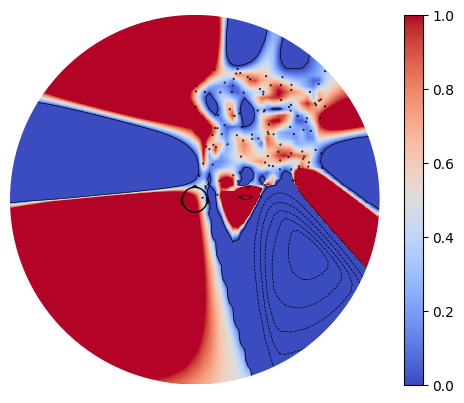

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Örnek EEG verisi ve elektrot konumları
n_channels = 114  # Elektrot sayısı
levels = np.random.rand(n_channels)  # EEG sinyal seviyeleri (örnek rastgele değerler)
positions = np.random.rand(n_channels, 2)  # Elektrot konumları (örnek rastgele)

# Parametreler
vmin, vmax = 0, 1  # Minimum ve maksimum değerler
cmap = 'coolwarm'  # Renk haritası

# EEG haritasını çizme
fig, ax = plt.subplots()
im, cm = mne.viz.plot_topomap(levels, positions, axes=ax, vlim=(vmin, vmax),
                              cmap=cmap, mask=None, mask_params={'markersize': 4, 'markerfacecolor': 'black'}, show=False)
plt.colorbar(im, ax=ax)  # Renk skalası ekle
plt.show()

